<h1>Importación de librerias</h1>

In [1]:
import os
import pandas as pd
from osgeo import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Proceso de carga de datos en formato .TIF para poder ser manipulados y visualizados</h2>
<p>Creamos vectores donde almacenar los nombres de archivos</p>

In [2]:
dir = "Raster/Lupion_final"
ficheros=[]
nombre=[]

<p>Path de ficheros TIF para ordenarlos</p>

In [3]:
for file in os.listdir(dir):
        if file.endswith(".tif"):
            ficheros.append(os.path.join(dir, file))
            nombre.append(file.split('.')[0])

<p>Ordenamos por nombre la lista de ficheros y de nombres de ficheros</p>

In [4]:
sorted(ficheros)
sorted(nombre)

['Altitud',
 'Arcillas',
 'Arenas',
 'Carbonatos',
 'Carbono_Organico',
 'Carcavas',
 'Curvatura_Perfil',
 'Curvatura_Plana',
 'Distancia_Carreteras',
 'Factor_LS',
 'Geologia',
 'Limos',
 'Orientaciones',
 'Overland_Flow_Distance',
 'Pendiente',
 'Stream_Power_Index',
 'Topographic_Position_Index',
 'Topographic_Wetness_Index',
 'Unidades_Edaficas',
 'Usos_Del_Suelo']

<p>Creamos un Dataframe con el nombre de los TIF</p>

In [5]:
datos = pd.DataFrame(columns=nombre)

<p>Recoger tamaño de las imagenes TIF que vamos a tratar</p>

In [6]:
numero_fichero_recorte = 0
tif = gdal.Open(ficheros[numero_fichero_recorte])
print(ficheros[numero_fichero_recorte])
tif_band = tif.GetRasterBand(1)
x = tif_band.XSize
y = tif_band.YSize
print("Tamaño archivos cargados:",x,"x",y,"\n")

Raster/Lupion_final\Altitud.tif
Tamaño archivos cargados: 4627 x 1914 



Recorremos lista de ficheros. SOLO TRATAMOS LOS DATOS NO DATA -> -1

In [7]:
contador = 0
for f in ficheros:
    n = nombre[contador]
    MDT = gdal.Open(f)
    
    # Patrones sin datos se incluyen como -1
    MDT.GetRasterBand(1).SetNoDataValue(-1)
    
    # Pasamos los datos a float
    band = MDT.GetRasterBand(1).ReadAsArray().astype(float)
    
    # Se desechan las dos primeras filas y columnas debido a calculos de borde
    if(n == "Carcavas"): 
        band = band[:, 1:x]
    elif (n == "Curvatura_Perfil" or n == "Curvatura_Plana" or n == "Distancia_Carreteras"
          or n == "Orientaciones" or n == "Pendiente" or n == "Unidades_Edaficas" or n == "Usos_Del_Suelo"):
        band = band[:, :]
    else:
        band = band[1:y, 1:x] 
        
    x_recorte = x - 1
    y_recorte = y - 1 
    
    print("Estoy en la capa: ", n, "con Xr: ", x_recorte, " y Yr: ", y_recorte)
    print("Band: ", band.shape)
    
    # Reconstruimos el array con el tamaño de filas x columnas   
    band = np.reshape(band, x_recorte*y_recorte)
    
    # Estos serán nuestros datos
    datos[n] = band
    
    contador = contador + 1
print("-- Finalizado --")

Estoy en la capa:  Altitud con Xr:  4626  y Yr:  1913
Band:  (1913, 4626)
Estoy en la capa:  Arcillas con Xr:  4626  y Yr:  1913
Band:  (1913, 4626)
Estoy en la capa:  Arenas con Xr:  4626  y Yr:  1913
Band:  (1913, 4626)
Estoy en la capa:  Carbonatos con Xr:  4626  y Yr:  1913
Band:  (1913, 4626)
Estoy en la capa:  Carbono_Organico con Xr:  4626  y Yr:  1913
Band:  (1913, 4626)
Estoy en la capa:  Carcavas con Xr:  4626  y Yr:  1913
Band:  (1913, 4626)
Estoy en la capa:  Curvatura_Perfil con Xr:  4626  y Yr:  1913
Band:  (1913, 4626)
Estoy en la capa:  Curvatura_Plana con Xr:  4626  y Yr:  1913
Band:  (1913, 4626)
Estoy en la capa:  Distancia_Carreteras con Xr:  4626  y Yr:  1913
Band:  (1913, 4626)
Estoy en la capa:  Factor_LS con Xr:  4626  y Yr:  1913
Band:  (1913, 4626)
Estoy en la capa:  Geologia con Xr:  4626  y Yr:  1913
Band:  (1913, 4626)
Estoy en la capa:  Limos con Xr:  4626  y Yr:  1913
Band:  (1913, 4626)
Estoy en la capa:  Orientaciones con Xr:  4626  y Yr:  1913
Band:  (

<hr></hr>

<h2>Tratamiento de datos</h2>

In [8]:
print("Número de datos antes del tratamiento ", datos.size)


datos = datos[datos['Altitud'] >= 0]
datos = datos[datos['Arcillas'] >= 0]
datos = datos[datos['Carbonatos'] >= 0]
datos = datos[datos['Carbono_Organico'] >= 0]
datos = datos[datos['Carcavas'] != 255]
datos = datos[datos['Curvatura_Perfil'] != -3.4028230607370965e+38]
datos = datos[datos['Distancia_Carreteras'] >= 0]
datos = datos[datos['Orientaciones'] >= 0]
datos = datos[datos['Overland_Flow_Distance'] != -99999.0]
#datos = datos[datos['Factor_LS'] >= 0]
#datos = datos[datos['Pendiente'] != -9999.0]

# Geología
datos.loc[datos.Geologia == 8996, "Geologia"] = "Terraza_Alta"
datos.loc[datos.Geologia == 9000, "Geologia"] = "Glacis"
datos.loc[datos.Geologia == 9001, "Geologia"] = "Terraza_Media"
datos.loc[datos.Geologia == 9002, "Geologia"] = "Depositos_Vertientes"
datos.loc[datos.Geologia == 9003, "Geologia"] = "Caliches"
datos.loc[datos.Geologia == 9004, "Geologia"] = "Llanuras_Inundacion"
datos.loc[datos.Geologia == 9133, "Geologia"] = "Margas_A_B"
datos.loc[datos.Geologia == 9134, "Geologia"] = "S_Turbidicos"

print("Número de datos despues del tratamiento ", datos.size)

datos.Factor_LS = datos.Factor_LS.round(4) 

Número de datos antes del tratamiento  176990760
Número de datos despues del tratamiento  64463220


<hr>

<h1>Proceso de visualización de datos</h1>

<b>1. ALTITUD (Continua)</b>

In [9]:
print("Max: " , max(datos.Altitud))
print("Min: " , min(datos.Altitud))
print("Media: " , datos["Altitud"].mean())
print("STD: " , datos["Altitud"].std())

Max:  706.3629760742188
Min:  238.5760040283203
Media:  353.51568015722273
STD:  82.3798772996415


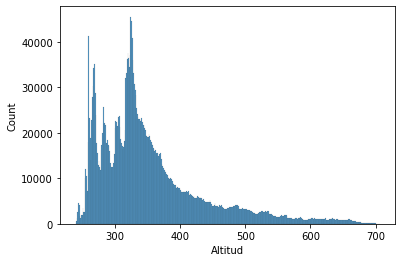

In [10]:
sns.histplot(data=datos, x="Altitud")
plt.show()

<hr>

<b>2. ARCILLAS (Continua)</b>

In [11]:
print("Max: " , max(datos.Arcillas))
print("Min: " , min(datos.Arcillas))
print("Media: " , datos["Arcillas"].mean())
print("STD: " , datos["Arcillas"].std())

Max:  47.397674560546875
Min:  22.476350784301758
Media:  34.789269044047906
STD:  5.382322511950309


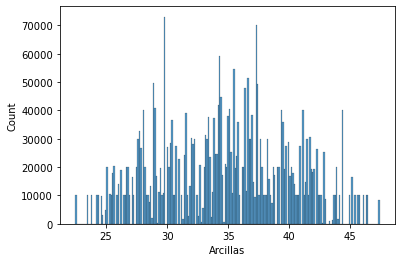

In [12]:
sns.histplot(data=datos, x="Arcillas")
plt.show()

<hr>

<b>3. ARENAS (Continua)</b>

In [13]:
print("Max: " , max(datos.Arenas))
print("Min: " , min(datos.Arenas))
print("Media: " , datos["Arenas"].mean())
print("STD: " , datos["Arenas"].std())

Max:  48.31993103027344
Min:  3.9655609130859375
Media:  22.363527565970838
STD:  9.811336006772887


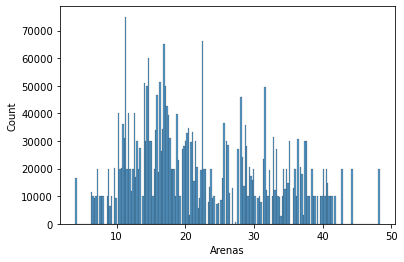

In [14]:
sns.histplot(data=datos, x="Arenas")
plt.show()

<hr>

<b>4. CARBONATOS (Discreta)</b>

In [15]:
print("Máximo: ", max(datos.Carbonatos))
print("Mínimo: ", min(datos.Carbonatos))
print("Media: ", datos["Carbonatos"].mean())
print("STD: ", datos["Carbonatos"].std())

Máximo:  580.1859741210938
Mínimo:  109.88322448730469
Media:  312.9668693795104
STD:  101.69296662079319


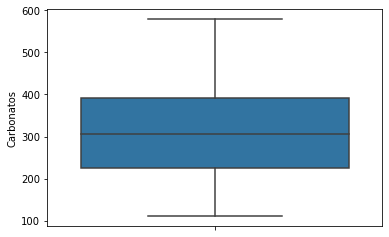

In [16]:
sns.boxplot( y=datos["Carbonatos"] );
plt.show()

<hr>

<b>5. CARBONO ORGÁNICO (Continua)</b>

In [17]:
print("Max: " , max(datos.Carbono_Organico))
print("Min: " , min(datos.Carbono_Organico))
print("Media: " , datos["Carbono_Organico"].mean())
print("STD: " , datos["Carbono_Organico"].std())

Max:  20.520057678222656
Min:  9.939423561096191
Media:  11.562143713474882
STD:  0.960999122234677


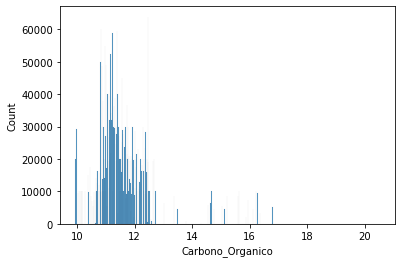

In [18]:
sns.histplot(data=datos, x="Carbono_Organico")
plt.show()

<hr>

<b>6. CARCAVAS (Categórica)</b>

0.0    3187886
1.0      35275
Name: Carcavas, dtype: int64


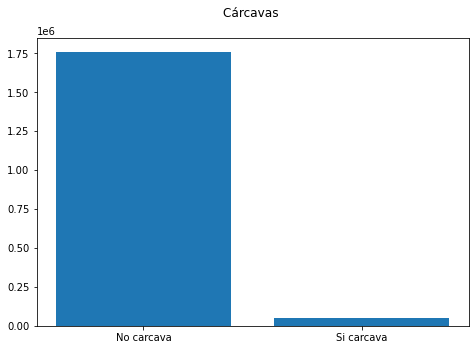

In [19]:
print(datos['Carcavas'].value_counts())
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
langs = ['No carcava','Si carcava']
valores = [1760738, 48898]
ax.bar(langs, valores)
plt.title('Cárcavas \n')
plt.show()

<hr>

<b>7. CURVATURA PERFIL (Continua)</b>

In [20]:
print("Máximo: ", max(datos.Curvatura_Perfil))
print("Mínimo: ", min(datos.Curvatura_Perfil))
print("Media: ", datos["Curvatura_Perfil"].mean())
print("STD: ", datos["Curvatura_Perfil"].std())

Máximo:  22.531675338745117
Mínimo:  -24.181676864624023
Media:  0.0014702682867024142
STD:  0.8644771032755139


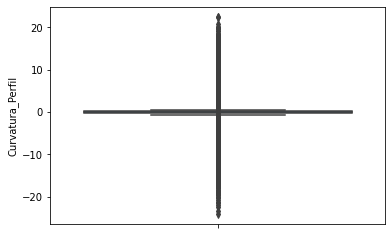

[-4.21742535 -1.52117085 -1.03093052 ...  0.04171285 -0.0067312
 -0.03877738]


In [21]:
sns.boxplot( y=datos["Curvatura_Perfil"] );
plt.show()
print(datos.Curvatura_Perfil.unique())

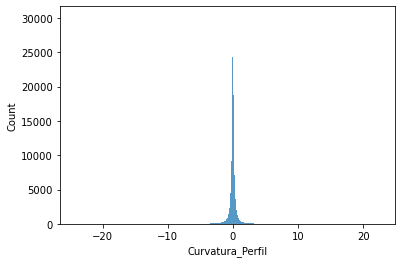

In [22]:
sns.histplot(data=datos, x="Curvatura_Perfil")
plt.show()

<hr>

<b>8. CURVATURA PLANA (Continua)</b>

In [23]:
print(datos.Curvatura_Plana.unique())

[ 0.3267642   2.2363975   0.77802944 ... -0.01443949 -0.00258081
  0.06937692]


In [24]:
print("Máximo: ", max(datos.Curvatura_Plana))
print("Mínimo: ", min(datos.Curvatura_Plana))
print("Media: ", datos["Curvatura_Plana"].mean())
print("STD: ", datos["Curvatura_Plana"].std())

Máximo:  14.572258949279785
Mínimo:  -17.618528366088867
Media:  0.004737862563446403
STD:  0.5343780754766523


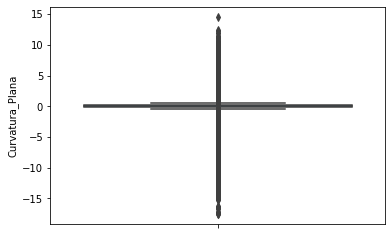

In [25]:
sns.boxplot( y=datos["Curvatura_Plana"] );
plt.show()

<hr>

<b>9. DISTANCIA CARRETERAS (Continua)</b>

In [26]:
print("Máximo: ", max(datos.Distancia_Carreteras))
print("Mínimo: ", min(datos.Distancia_Carreteras))
print("Media: ", datos["Distancia_Carreteras"].mean())
print("STD: ", datos["Distancia_Carreteras"].std())

Máximo:  2873.434326171875
Mínimo:  0.0
Media:  681.4225780761594
STD:  552.1617266969439


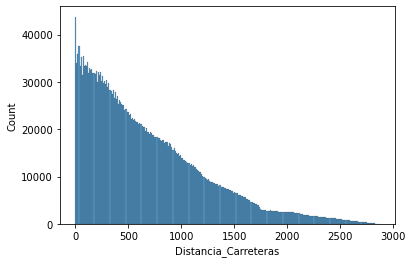

In [27]:
sns.histplot(data=datos, x="Distancia_Carreteras")
plt.show()

<hr>

<b>10. FACTOR LS (Continua)</b>

<hr>

<b>11. GEOLOGIA (Categórico)</b>

In [28]:
print(datos.Geologia.unique())

['Terraza_Media' 'Glacis' 'Depositos_Vertientes' 'Margas_A_B'
 'Llanuras_Inundacion' 'Caliches' 'S_Turbidicos' 'Terraza_Alta']


In [29]:
print(datos['Geologia'].value_counts())

Margas_A_B              1635761
Terraza_Media            912888
Caliches                 654320
Llanuras_Inundacion        6546
Depositos_Vertientes       6210
Glacis                     3782
Terraza_Alta               2309
S_Turbidicos               1345
Name: Geologia, dtype: int64


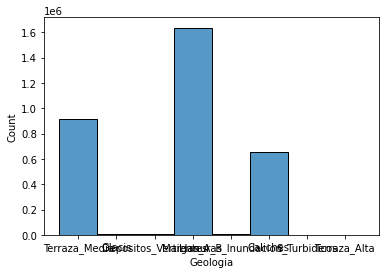

In [30]:
sns.histplot(data=datos, x="Geologia")
plt.show()

<hr>

<b>12. LIMOS (Continua)</b>

In [31]:
print("Max: " , max(datos.Limos))
print("Min: " , min(datos.Limos))
print("Media: " , datos["Limos"].mean())
print("STD: " , datos["Limos"].std())

Max:  54.02328109741211
Min:  26.431808471679688
Media:  42.84720352247234
STD:  5.361218621793714


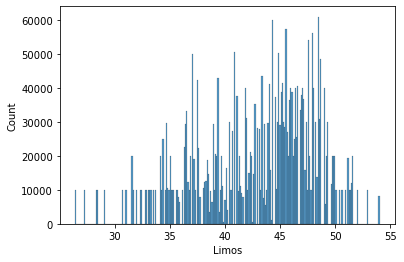

In [32]:
sns.histplot(data=datos, x="Limos")
plt.show()

<hr>

<b>13. ORIENTACIONES (Categórica)</b>

In [33]:
print("Máximo: ", max(datos.Orientaciones))
print("Mínimo: ", min(datos.Orientaciones))
print("Media: ", datos["Orientaciones"].mean())
print("STD: ", datos["Orientaciones"].std())

Máximo:  359.9991760253906
Mínimo:  0.0
Media:  214.7973976442641
STD:  89.33963273106215


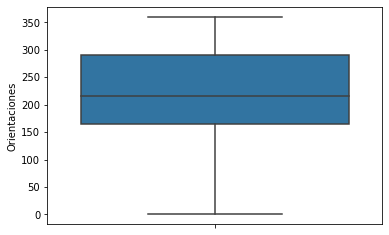

In [34]:
sns.boxplot( y=datos["Orientaciones"] );
plt.show()

<hr>

<b>14. OVERLAND FLOW DISTANCE (Continua)</b>

In [35]:
print("Máximo: ", max(datos.Overland_Flow_Distance))
print("Mínimo: ", min(datos.Overland_Flow_Distance))
print("Media: ", datos["Overland_Flow_Distance"].mean())
print("STD: ", datos["Overland_Flow_Distance"].std())

Máximo:  4398.07373046875
Mínimo:  0.0
Media:  1055.1003173847182
STD:  753.3799092673021


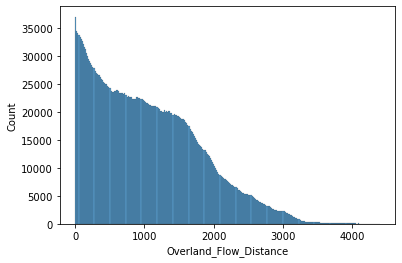

In [36]:
sns.histplot(data=datos, x="Overland_Flow_Distance")
plt.show()

<hr>

<b>15. PENDIENTE (Continua)</b>

In [37]:
print("Máximo: ", max(datos.Pendiente))
print("Mínimo: ", min(datos.Pendiente))
print("Media: ", datos["Pendiente"].mean())
print("STD: ", datos["Pendiente"].std())

Máximo:  59.113155364990234
Mínimo:  0.0003793128707911819
Media:  6.590759593086103
STD:  6.122722475783597


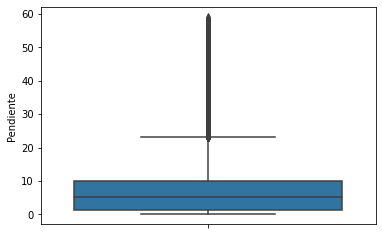

In [38]:
sns.boxplot( y=datos["Pendiente"] );
plt.show()

<hr>

<b>15. STREAM POWER INDEX (Continua)</b>

In [39]:
print("Máximo: ", max(datos.Stream_Power_Index))
print("Mínimo: ", min(datos.Stream_Power_Index))
print("Media: ", datos["Stream_Power_Index"].mean())
print("STD: ", datos["Stream_Power_Index"].std())

Máximo:  5968616960.0
Mínimo:  -66611159040.0
Media:  -27649.1541039364
STD:  38711509.66819021


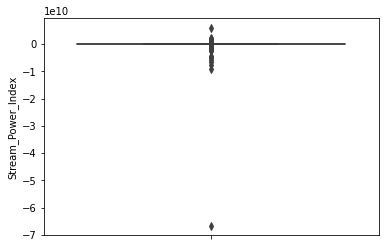

In [40]:
sns.boxplot( y=datos["Stream_Power_Index"] );
plt.show()

<hr>

<b>16. TOPOGRAPHIC POSITION INDEX (Continua)</b>

In [41]:
print("Máximo: ", max(datos.Topographic_Position_Index))
print("Mínimo: ", min(datos.Topographic_Position_Index))
print("Media: ", datos["Topographic_Position_Index"].mean())
print("STD: ", datos["Topographic_Position_Index"].std())

Máximo:  21.12669563293457
Mínimo:  -17.413028717041016
Media:  0.04108025219838416
STD:  1.9899794984341832


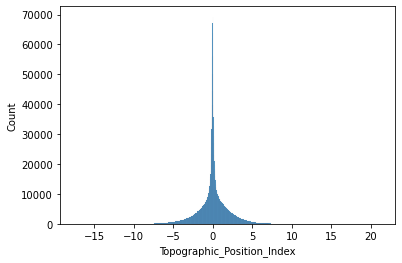

In [42]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>

<b>18. TOPOGRAPHIC WETNESS INDEX (Continua)</b>

In [43]:
print("Máximo: ", max(datos.Topographic_Wetness_Index))
print("Mínimo: ", min(datos.Topographic_Wetness_Index))
print("Media: ", datos["Topographic_Wetness_Index"].mean())
print("STD: ", datos["Topographic_Wetness_Index"].std())

Máximo:  22.791540145874023
Mínimo:  -7.564307689666748
Media:  9.193776878684771
STD:  3.8405756101157955


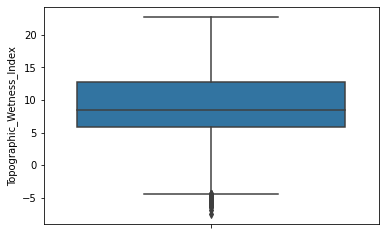

In [44]:
sns.boxplot( y=datos["Topographic_Wetness_Index"] );
plt.show()

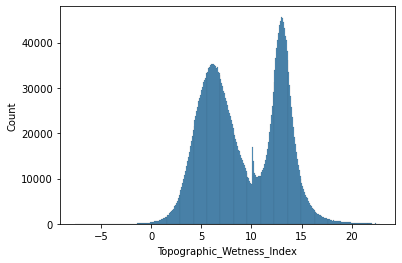

In [45]:
sns.histplot(data=datos, x="Topographic_Wetness_Index")
plt.show()

<hr>

<b>19. UNIDADES EDÁFICAS (Categórica)</b>

In [46]:
print(datos.Unidades_Edaficas.unique())

[6. 2. 1. 3. 4. 5.]


In [47]:
print(datos['Unidades_Edaficas'].value_counts())

1.0    1152017
4.0     621597
3.0     597844
6.0     402929
5.0     237418
2.0     211356
Name: Unidades_Edaficas, dtype: int64


<hr>

<b>20. USOS DEL SUELO (Categórica)</b>

In [48]:
print(datos.Usos_Del_Suelo.unique())

[7. 5. 3. 1. 2. 9. 6. 4.]


In [49]:
print(datos['Usos_Del_Suelo'].value_counts())

5.0    2675906
3.0     411389
7.0     102644
6.0      14537
9.0      10861
1.0       6944
2.0        739
4.0        141
Name: Usos_Del_Suelo, dtype: int64


<hr>

<h1>Matriz de correlación de variables</h1>

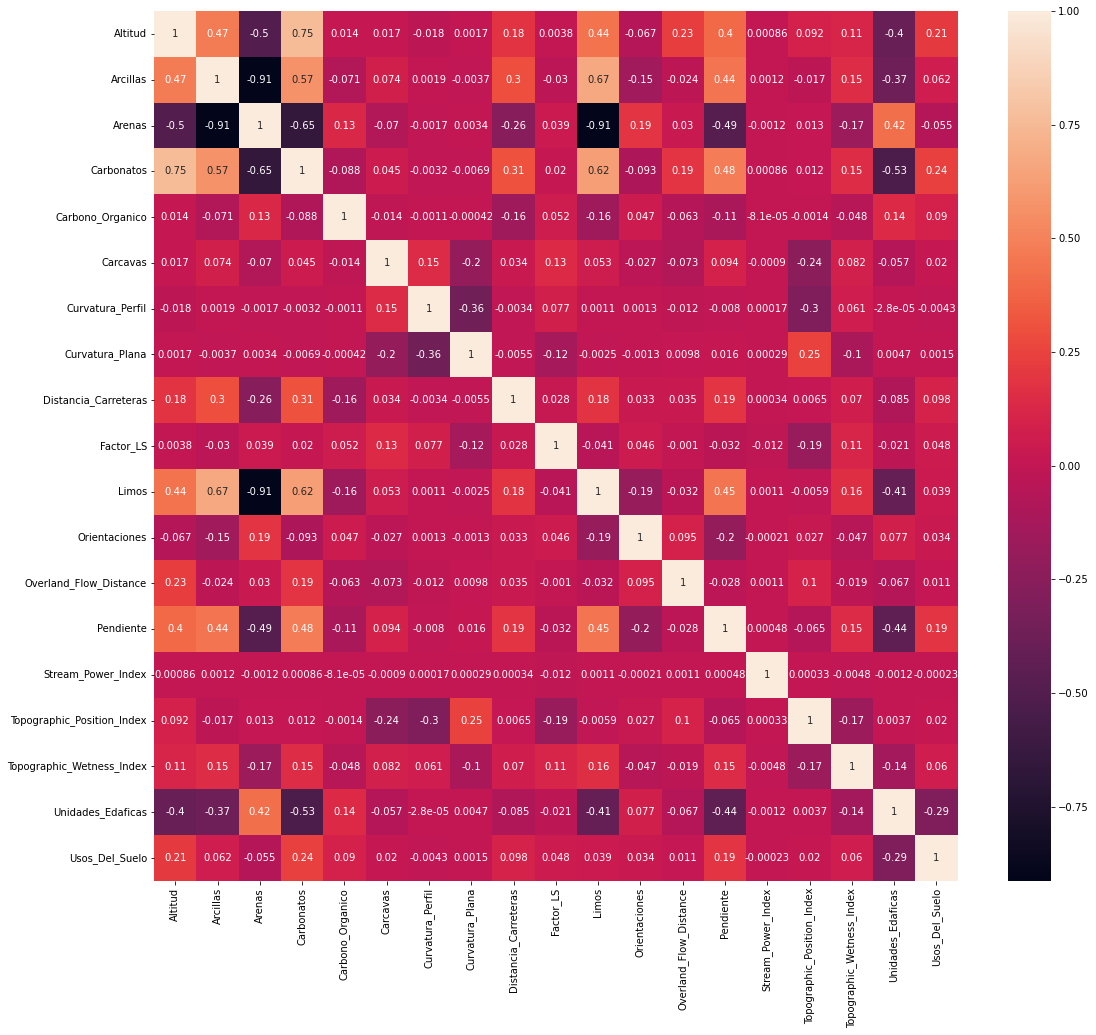

In [50]:
corr_datos = datos.corr(method='pearson')

plt.figure(figsize=(18, 16))
sns.heatmap(corr_datos, annot=True)
plt.show()